# Explore here

In [1]:
import pandas as pd
data= pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv")

print(data.shape)
data.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
data.drop("id", axis = 1).duplicated().sum()

np.int64(0)

In [5]:
room_types = data['room_type'].value_counts()
room_types

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [6]:
data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

#HAY UN PRECIO 0 #

In [7]:
data = data[data["price"] > 0]

In [8]:
data.isnull().sum().sort_values(ascending=False)

last_review                       10051
reviews_per_month                 10051
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
data.drop(["reviews_per_month","host_name","last_review"], axis = 1, inplace = True)
data.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [10]:
Neighbourhood = data['neighbourhood'].value_counts()
Neighbourhood

neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

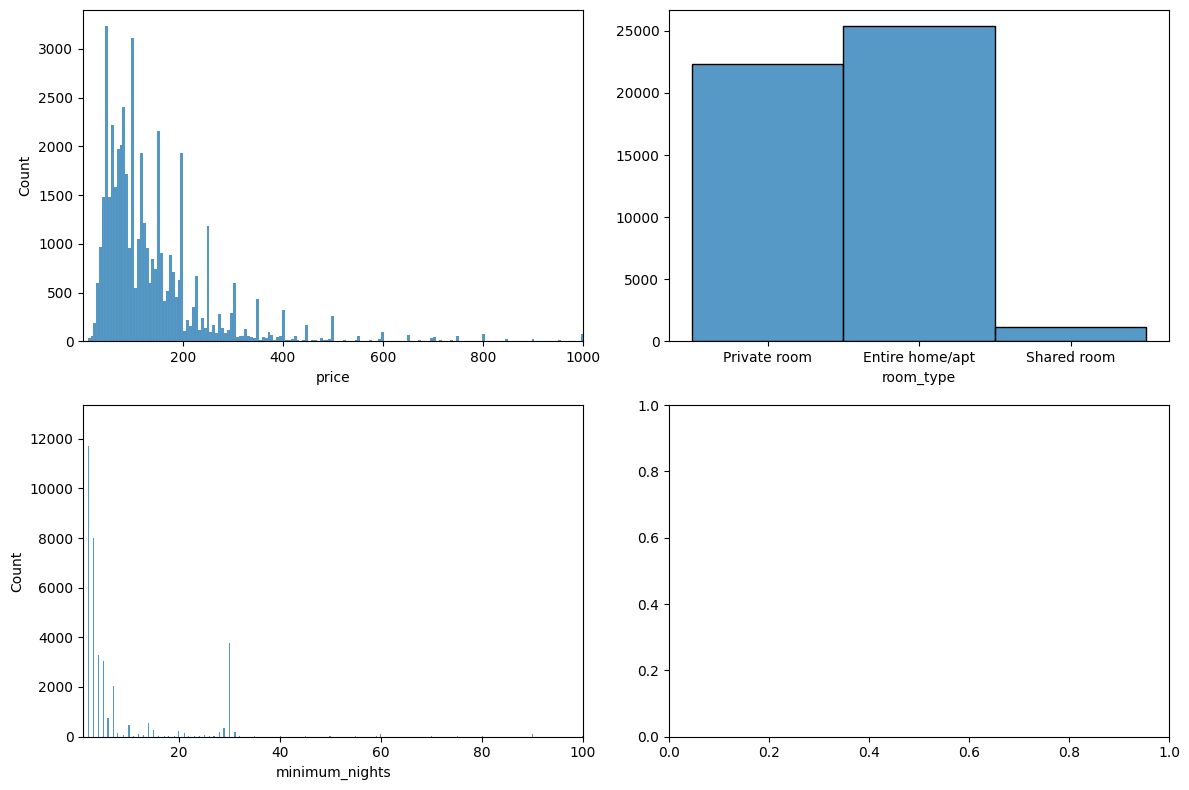

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (12, 8))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "price").set_xlim(1,1000)
sns.histplot(ax = axis[0, 1], data = data, x = "room_type").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "minimum_nights").set_xlim(1,100)


plt.tight_layout()
plt.show()

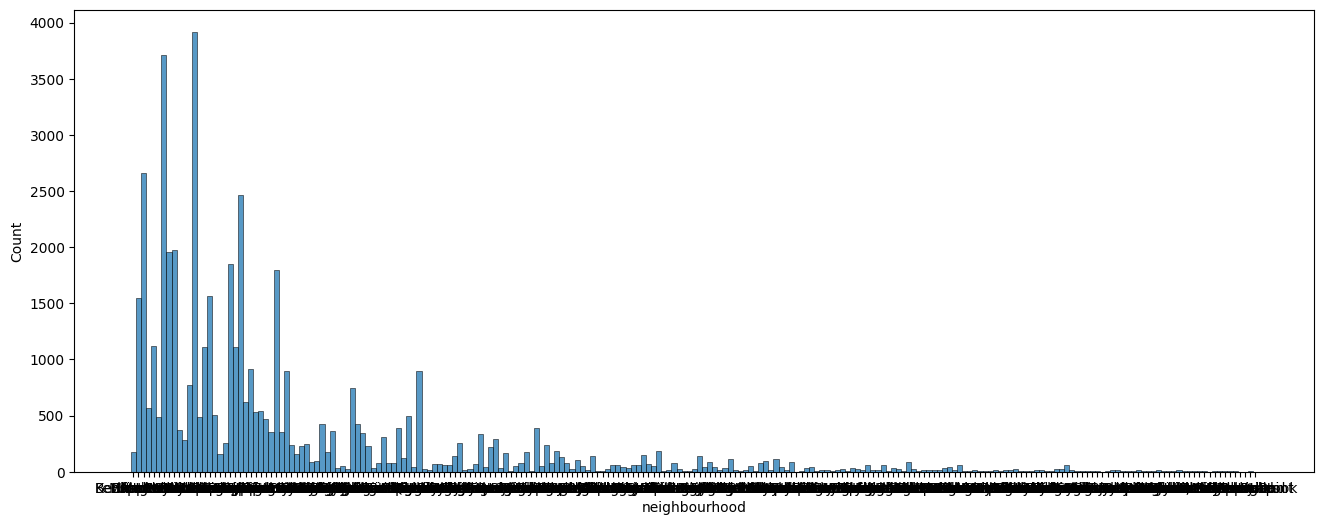

In [12]:
plt.figure(figsize=(16,6))
sns.histplot(data=data, x="neighbourhood").set
plt.show()

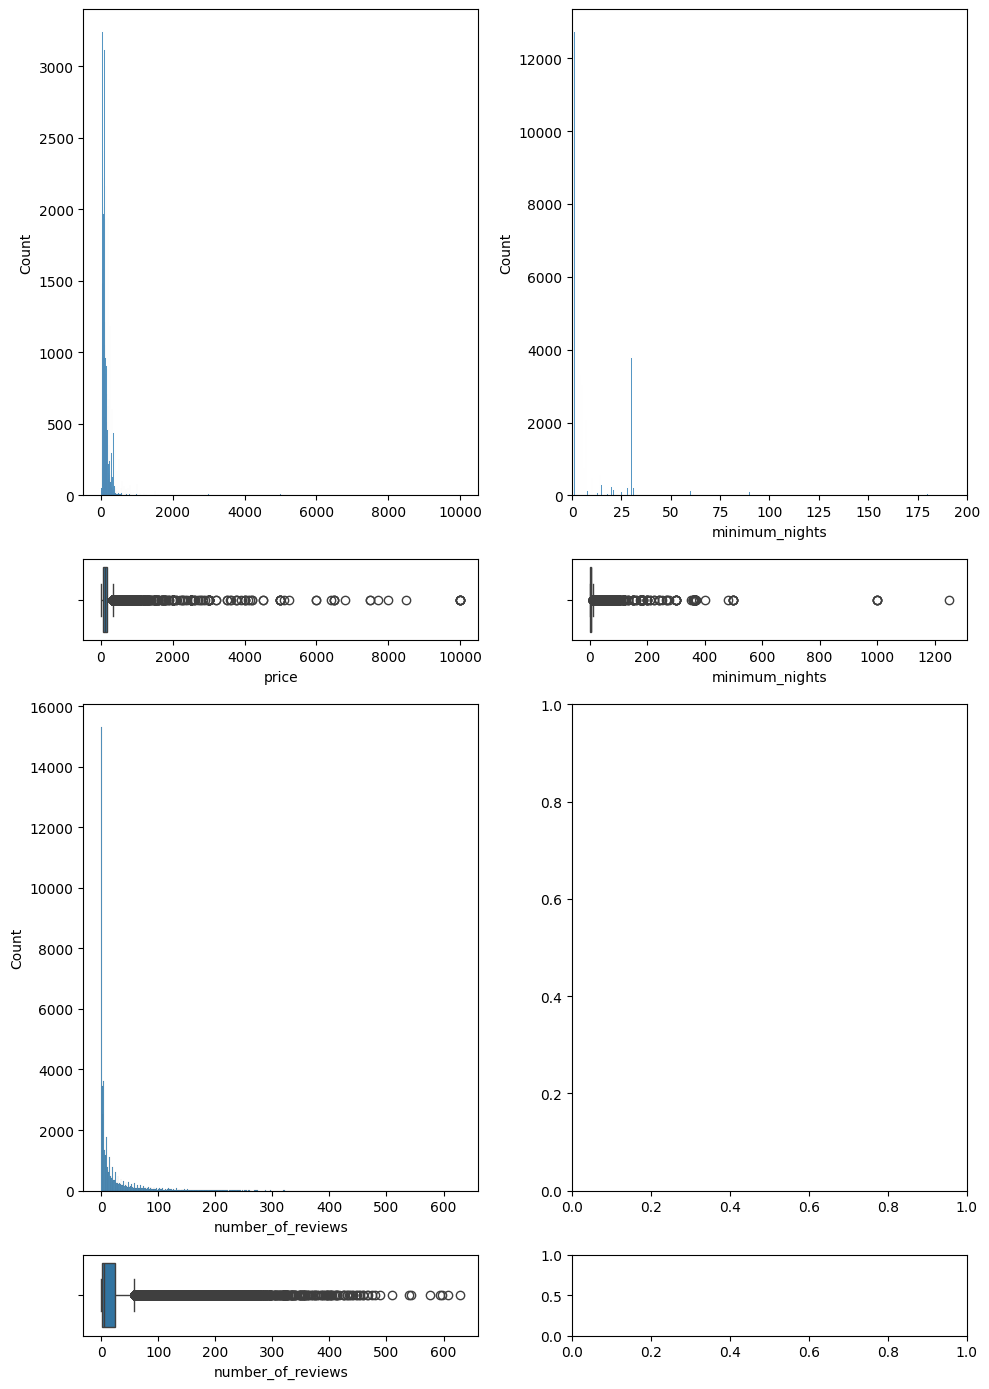

In [13]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw={'height_ratios': [6, 1, 6,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "price")
sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

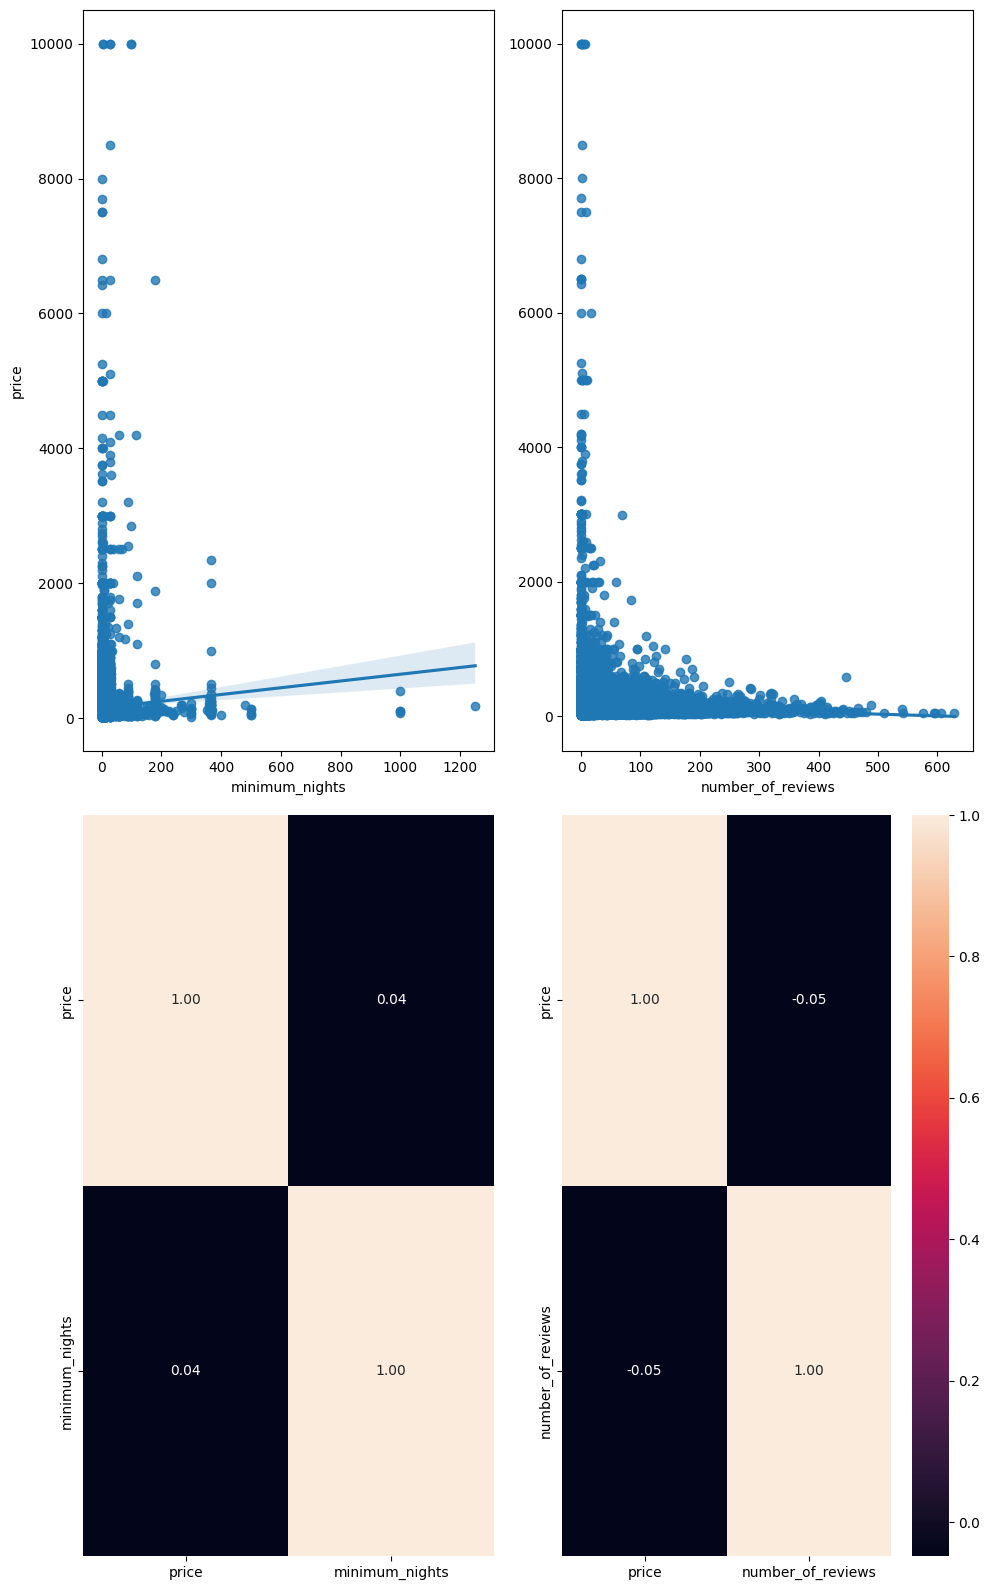

In [14]:

fig, axis = plt.subplots(2, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data =data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Cero relación

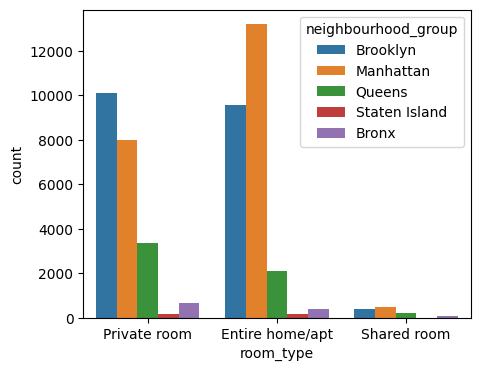

In [15]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group")

plt.show()

Manhattan es el lugar donde más rentas hay y son principalmente departamentos enteros
Broklin es el segundo, puede que sea más caro por que se arrienda piezas privadas

In [16]:
nights_stats = data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [17]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]
upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(upper_limit.round(2))
print(lower_limit.round(2))
print(nights_iqr.round(2))

11.0
-5.0
4.0


In [18]:
data = data[data["minimum_nights"] <= 15]
data.drop(["name"], axis = 1, inplace = True)

In [19]:
data.head()


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [20]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.326500e+04,4.326500e+04,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,1.890534e+07,6.708836e+07,40.727994,-73.950722,148.807859,2.962857,25.211950,3.369305,100.118017
std,1.092609e+07,7.843408e+07,0.055421,0.047182,210.776500,2.500413,46.292011,21.721688,125.915087
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.393332e+06,7.801481e+06,40.688810,-73.982310,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.956715e+07,3.098576e+07,40.721320,-73.954550,100.000000,2.000000,6.000000,1.000000,29.000000
75%,2.888751e+07,1.051629e+08,40.762990,-73.934460,175.000000,4.000000,27.000000,2.000000,184.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,15.000000,629.000000,327.000000,365.000000


In [21]:
data.isnull().sum().sort_values(ascending = False)

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

FUNCION TRAMPITA

In [22]:
def scaler(X_train_, X_test_, nums):
  X_train = X_train_.copy()
  X_test = X_test_.copy()
  scaler = StandardScaler()
  # Train
  X_train_scaled = pd.DataFrame(
             scaler.fit_transform(X_train[nums]),
             columns=scaler.get_feature_names_out(),
             index = X_train.index)
  X_train_scaled = X_train_scaled.join(X_train[list(set(X_train.columns)  - set(nums))])
  # Test
  X_test_scaled = pd.DataFrame(
      scaler.transform(X_test[nums]),
      columns = scaler.get_feature_names_out(),
      index = X_test.index)
  X_test_scaled = X_test_scaled.join(X_test[list(set(X_test.columns)  - set(nums))])
  X_test_scaled = X_test_scaled[X_train_scaled.columns]
  return X_train_scaled, X_test_scaled


def to_binary(X_train_, X_test_, cats):
  X_train =  X_train_.copy()
  X_test = X_test_.copy()
  ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
  # train
  X_train_bin = pd.DataFrame(ohe.fit_transform(
      X_train[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_train.index)
  X_train_bin = X_train_bin.join(X_train[list(set(X_train.columns)  - set(cats))])
  # test
  X_test_bin = pd.DataFrame(ohe.transform(X_test[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_test.index)
  X_test_bin = X_test_bin.join(X_test[list(set(X_test.columns)  - set(cats))])
  X_test_bin = X_test_bin[X_train_bin.columns]
  return X_train_bin, X_test_bin


In [23]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365"]
cat_variables = ["neighbourhood_group", "room_type"]
y ='price'

data= data[num_variables + cat_variables + [y]]

In [26]:
x, y = data.drop(columns='price'), data[y]

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [30]:
X_train_ml , X_test_ml = scaler(X_train, X_test, num_variables)

In [31]:
X_train_ml, X_test_ml = to_binary(X_train_ml, X_test_ml, cat_variables)

In [36]:
X_train_ml.to_csv("../data/processed/clean_train.csv", index = False)
X_test_ml.to_csv("../data/processed/clean_test.csv", index = False)